# 3. Summarize and visualize info from company questions

December 22, 2024

This notebook summarizes and visualizes the company questions responses (from currently and previously respondents).


## Setup

To learn more, see notebook #1


In [1]:
import os

# Set working directory to root of project
current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

from pprint import pprint
from src.plotter import Plotter
from src.respondent import Respondent
from src.analyst import Analyst
import src.utils as utils

from IPython import get_ipython

# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


In [2]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

# Summarize data from professional workers

In [3]:
# Initialize plotter
plotter = Plotter()

## Salary

In [4]:
res_company_salary = analyst.summarize_company_salary()
pprint(res_company_salary)

{'salary_base_list': array([1.25000e+05, 1.25000e+05, 1.45000e+05, 1.40000e+05, 1.65000e+05,
       4.90000e+04, 8.80000e+04, 1.34000e+05, 1.80000e+05, 2.20000e+06,
       3.60000e+05, 1.30000e+05, 1.80000e+05, 1.59000e+05,         nan,
       1.21000e+05, 7.50000e+04, 8.00000e+04,         nan, 4.00000e+04,
       1.75000e+05, 9.50000e+04, 1.95000e+05, 9.00000e+04, 1.55000e+05,
       1.20000e+05, 2.00000e+05, 1.00000e+05, 3.75000e+05, 1.35000e+05,
       8.85000e+04, 1.00000e+05, 1.70000e+05,         nan, 6.00000e+05,
       2.15000e+05, 8.00000e+04, 5.70000e+04, 9.60000e+05, 1.00000e+05,
       9.70000e+04, 1.30000e+05, 1.55000e+05, 5.30000e+04, 1.20000e+05,
       3.10000e+05, 1.00000e+02, 1.70000e+05, 8.00000e+04, 8.20000e+04,
       1.20000e+05, 1.80000e+05, 1.50000e+06, 2.20000e+05, 1.41000e+05,
       8.70000e+04, 7.19940e+05, 1.82000e+05, 9.50000e+04, 9.00000e+04,
       1.60000e+05,         nan, 1.28000e+05, 6.10000e+05, 8.40000e+04,
       9.00000e+04, 1.60000e+05, 1.47000e+0

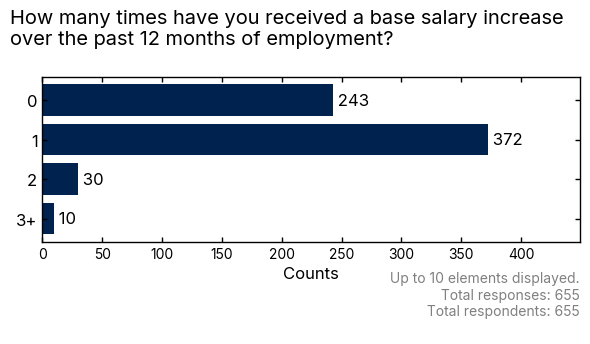

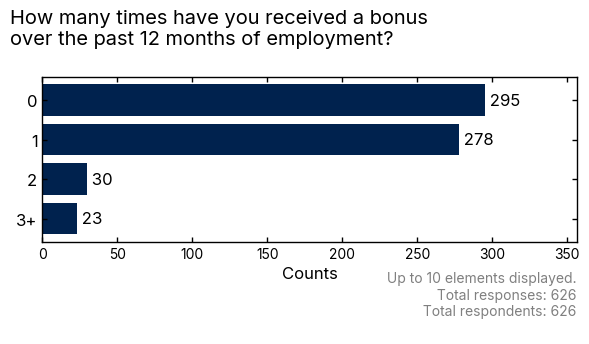

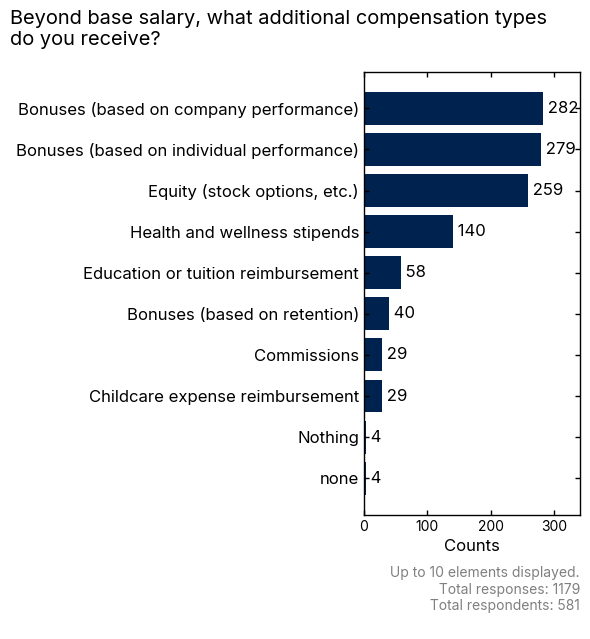

In [5]:
plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_raises'], by='keys', reverse=False),
    title='How many times have you received a base salary increase \nover the past 12 months of employment?',
    saveas='company_salary_num_raises.png'
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_bonuses'], by='keys', reverse=False),
    title='How many times have you received a bonus \nover the past 12 months of employment?',
    saveas='company_salary_num_bonuses.png'
)

plotter.make_bar_plot_from_dict(
    res_company_salary['salary_comp_types'],
    title='Beyond base salary, what additional compensation types \ndo you receive?',
    saveas='company_salary_comp_types.png',
    exclusions=['options', 'etc.)'],
    replacements={'Equity (stock' : 'Equity (stock options, etc.)'},
    sorted=True
)

## Company Info

In [6]:
res_company_info = analyst.summarize_company_info()
pprint(res_company_info)

{'company_country': {'Argentina': 2,
                     'Australia': 7,
                     'Belgium': 8,
                     'Canada': 23,
                     'Chile': 1,
                     'China': 11,
                     'Czech Republic': 1,
                     'Denmark': 3,
                     'Estonia': 1,
                     'Finland': 3,
                     'France': 18,
                     'Germany': 41,
                     'Hungary': 1,
                     'India': 40,
                     'Indonesia': 2,
                     'Iran': 3,
                     'Ireland {Republic}': 2,
                     'Israel': 4,
                     'Italy': 13,
                     'Japan': 3,
                     'Kenya': 1,
                     'Korea South': 3,
                     'Luxembourg': 1,
                     'Malaysia': 3,
                     'Mexico': 3,
                     'Morocco': 1,
                     'Netherlands': 11,
                     'Nigeria':

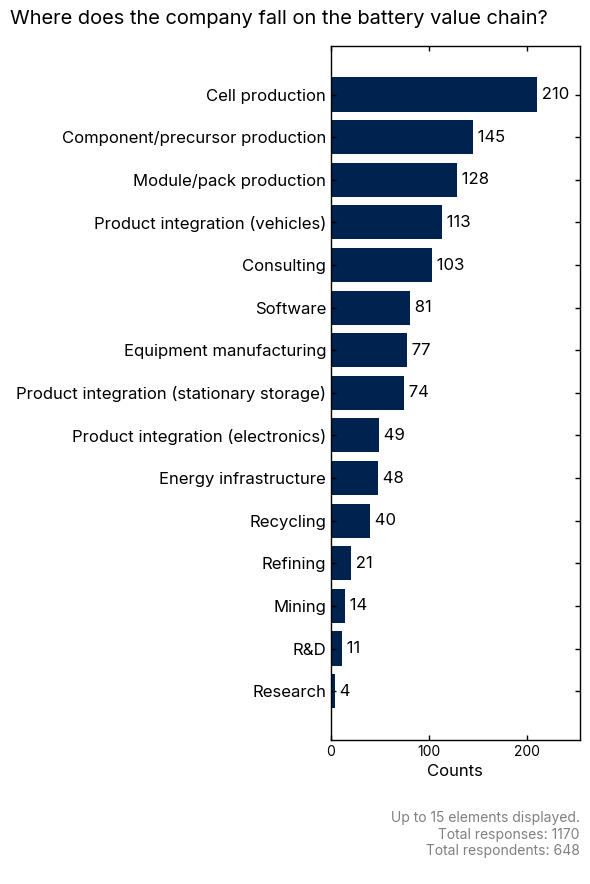

In [7]:
plotter.make_bar_plot_from_dict(res_company_info['company_value_chain'],
                                title='Where does the company fall on the battery value chain?',
                                saveas='company_value_chain.png',
                                num_elements=15,
                                exclusions=['mobility)'],
                                sorted=True,
                                replacements={'Product integration (vehicles' : 'Product integration (vehicles)'})

## Role

In [8]:
res_company_role = analyst.summarize_company_role()
pprint(res_company_role)

{'role_level': {'Career': 112,
                'Developing': 61,
                'Director/VP': 65,
                'Entry': 26,
                'Executive': 44,
                'Expert': 91,
                'Manager': 92,
                'Senior': 167,
                '_tot_': 658},
 'role_prev_industries': {'No': 217,
                          'Yes, in a different role': 187,
                          'Yes, in a similar role': 254,
                          '_tot_': 658},
 'role_prev_role_list': ['Distinguished Member of Technical Staff, Design for '
                         'Reliability',
                         'Administrative Assistant',
                         'product manger',
                         'Machine Design Engineer',
                         'Mechanical Engineer - Turbine Airfoils',
                         'Investment Analyst',
                         'Product development - body exterior',
                         'Director of R&D',
                         'Simul

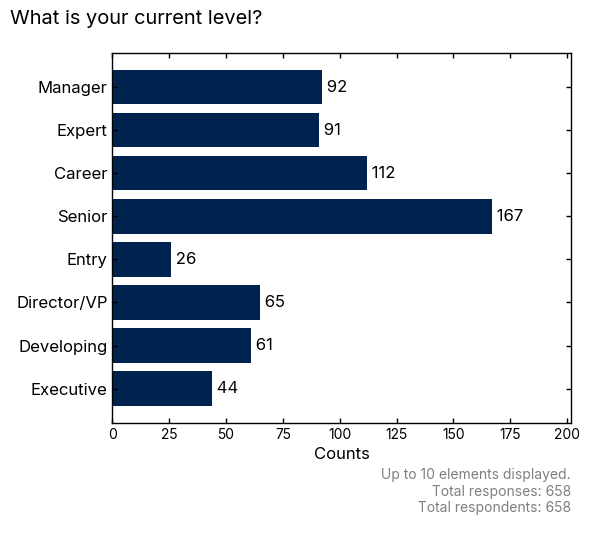

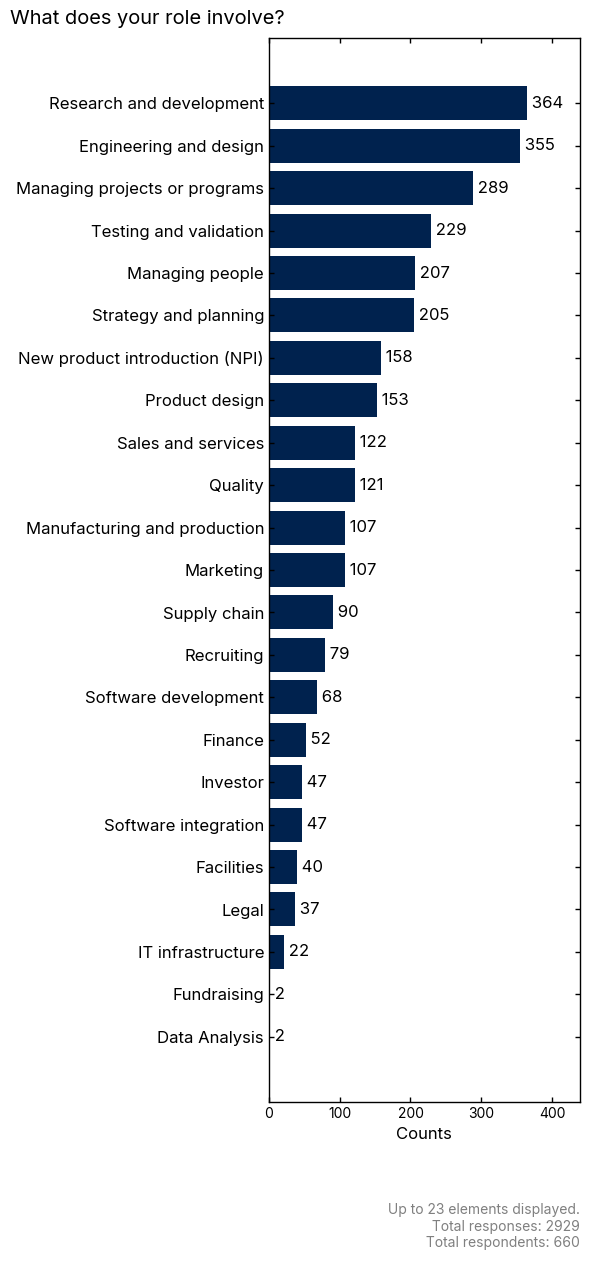

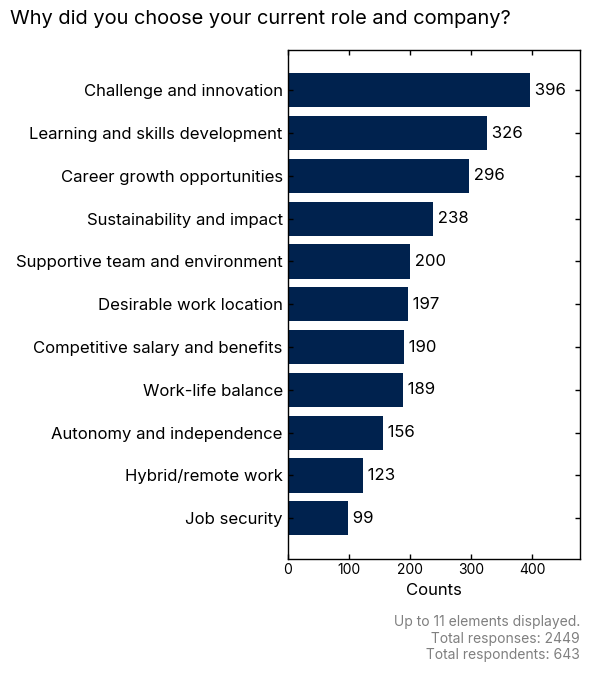

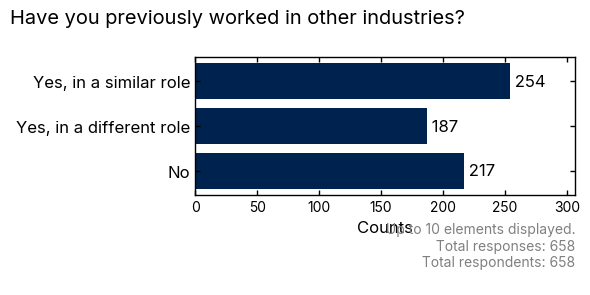

In [9]:
plotter.make_bar_plot_from_dict(res_company_role['role_level'],
                                title='What is your current level?',
                                saveas='company_role_level.png'
)

plotter.make_bar_plot_from_dict(
    res_company_role['role_role'],
    title='What does your role involve?',
    saveas='company_role.png',
    num_elements=23,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_role['role_why_choose'],
    title='Why did you choose your current role and company?',
    saveas='company_role_why_choose.png',
    num_elements=11,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_role['role_prev_industries'], by='keys', reverse=True),
    title='Have you previously worked in other industries?',
    saveas='company_role_previous_industries.png'
)

In [10]:
res_company_role['role_prev_role_list']

['Distinguished Member of Technical Staff, Design for Reliability',
 'Administrative Assistant',
 'product manger',
 'Machine Design Engineer',
 'Mechanical Engineer - Turbine Airfoils',
 'Investment Analyst',
 'Product development - body exterior',
 'Director of R&D',
 'Simulation engineer',
 'Automotive engineering for autonomous vehicles',
 'Senior Scientist',
 'project manager',
 'Instrumentation Engineer',
 'Patent Analyst',
 'Electrical Grid engineer',
 'Software Engineer',
 'Applications Engineer',
 'Scientist',
 'R&D in polymers industry',
 'Electronics manufacturing industry',
 'Senior Sourcing Manager',
 'Business Development Manager',
 'Senior Engineer',
 'Senior Materials Engineer',
 'Chemicals',
 'Laboratory Scientist',
 'engineer',
 'Metrology engineer',
 'solar expert',
 'Materials Scientist',
 'Automotive supplier analyst',
 'Science education and outreach',
 'Software engineer',
 'Intern for fuel cell manufacturing, graduate student',
 'I had many roles',
 'R&D',
 'Tec

## Company Skills

In [11]:
res_company_skills = analyst.summarize_company_skills()
pprint(res_company_skills)

{'barriers_to_talent_list': ['Startups are fighting headwinds in terms of '
                             'market and investment, startup culture is not '
                             'always the most professional, incumbents are '
                             'hard to displace',
                             'Location   (Michigan? no!)',
                             'Perception, Recruiters, Judgement',
                             'location, the potential of company or program to '
                             'succeed, team environment,',
                             'Lack of training programs specifically for the '
                             'battery industry, lack of awareness of the '
                             'battery industry',
                             'Lack of Specialised People; Large Growth in Job '
                             'Demand; Cyclic Industry',
                             'no knowledge of tech',
                             'Lack of Innovative Thinking & Pat

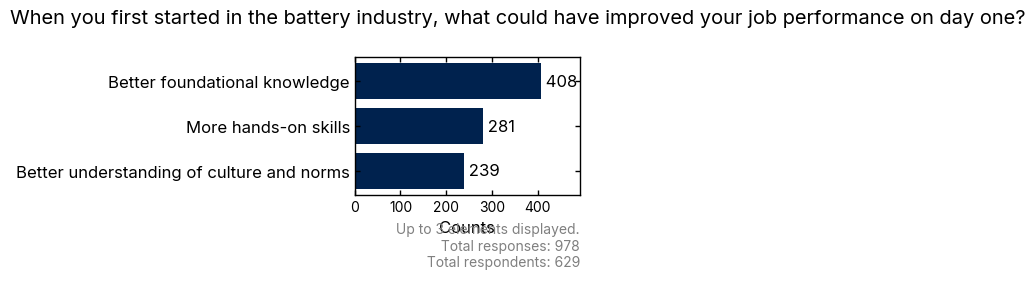

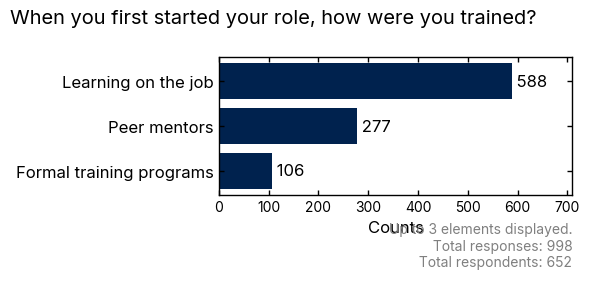

In [12]:
plotter.make_bar_plot_from_dict(
    res_company_skills['skills_how_to_improve'],
    title='When you first started in the battery industry, what could have improved your job performance on day one?',
    saveas='company_skills_how_to_improve.png',
    num_elements=3,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_skills['skills_how_was_trained'],
    title='When you first started your role, how were you trained?',
    saveas='company_skills_how_was_trained.png',
    num_elements=3,
    sorted=True
)

## Company Retention

In [13]:
res_company_retention = analyst.summarize_company_retention()
pprint(res_company_retention)

{'retention_factors': {'A non-toxic work environment and quality upper management': 1,
                       'Autonomy': 1,
                       'Career growth opportunities': 447,
                       'Chance of Success of Companies Technology/Product': 1,
                       'Company Viability and Trajectory': 1,
                       'Company Vision and Goals': 1,
                       'Company culture': 420,
                       'Company vision': 1,
                       "Company's chance for success": 1,
                       'Eco-friendliness': 1,
                       'Equity': 219,
                       'Ethics': 1,
                       'For a different potentially better role/interesting tasks': 1,
                       'Good manager': 1,
                       'I will not seek another opportunity': 1,
                       "I'm getting close to retirement and am not looking for another job.": 1,
                       'Impact': 1,
                       'I

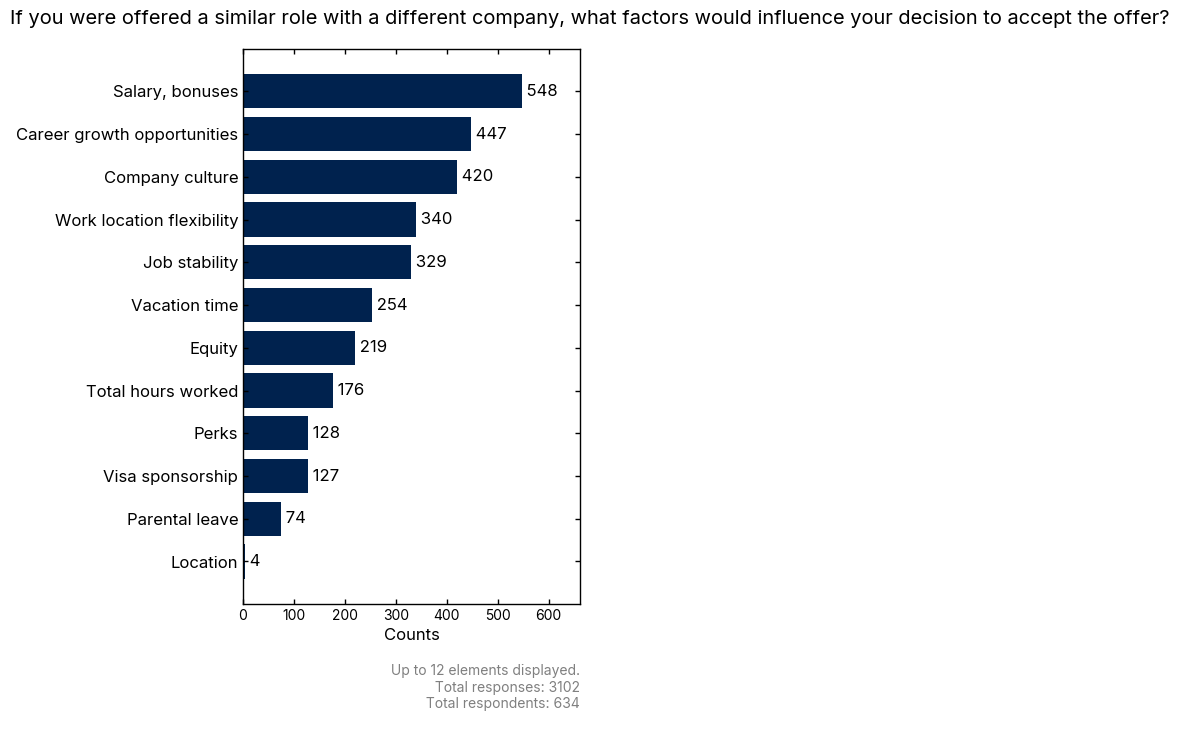

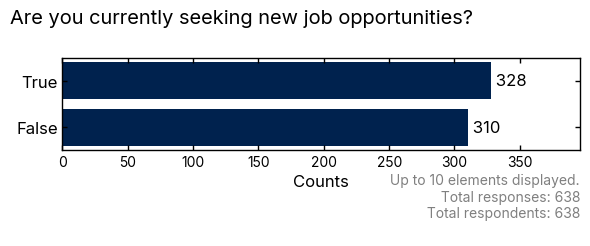

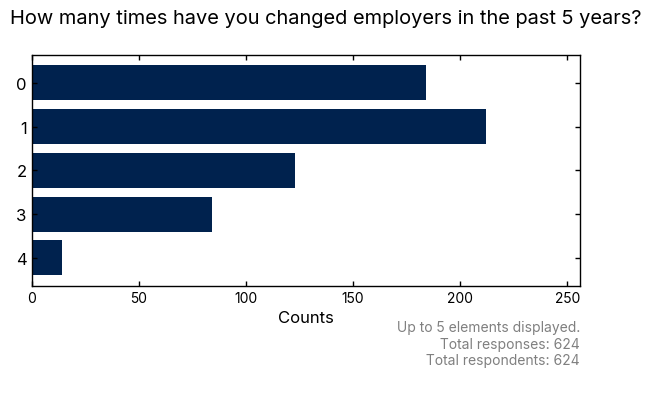

In [14]:
plotter.make_bar_plot_from_dict(
    res_company_retention['retention_factors'],
    title='If you were offered a similar role with a different company, what factors would influence your decision to accept the offer?',
    saveas='company_retention_factors.png',
    exclusions=['bonuses'],
    replacements={'Salary': 'Salary, bonuses'},
    num_elements=12,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_retention['retention_is_on_market'],
    title='Are you currently seeking new job opportunities?',
    saveas='company_retention_is_on_market.png',
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_retention['retention_num_employer_changes'],
    title='How many times have you changed employers in the past 5 years?',
    saveas='company_retention_num_employer_changes.png',
    num_elements=5,
)

## Company Benefits

In [15]:
res_company_benefits = analyst.summarize_company_benefits()
pprint(res_company_benefits)

{'benefits_priorities': {'keys': ['Mental health support',
                                  'Work-life balance initiatives',
                                  'Financial wellness programs',
                                  'Career development opportunities'],
                         'mean': array([3.13615023, 3.13551402, 2.83568075, 3.07328605]),
                         'stdev': array([1.18292159, 1.18216911, 1.10536215, 1.15544567]),
                         'values': array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       ...,
       [ 3.,  3.,  1.,  3.],
       [ 3.,  4.,  3.,  4.],
       [ 3.,  3.,  5.,  3.]], shape=(665, 4))},
 'entitlements': {'Advance salary': 1,
                  'Child care FSA account': 1,
                  'Educational': 100,
                  'Employee Stock Purchase Program': 1,
                  'Engineer title cost repayment': 1,
                  'Gym or physical wellness stipend': 94,
                  'Health

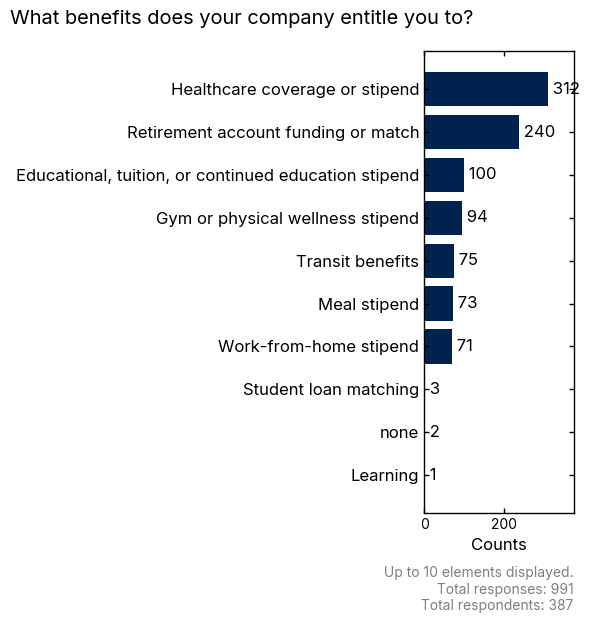

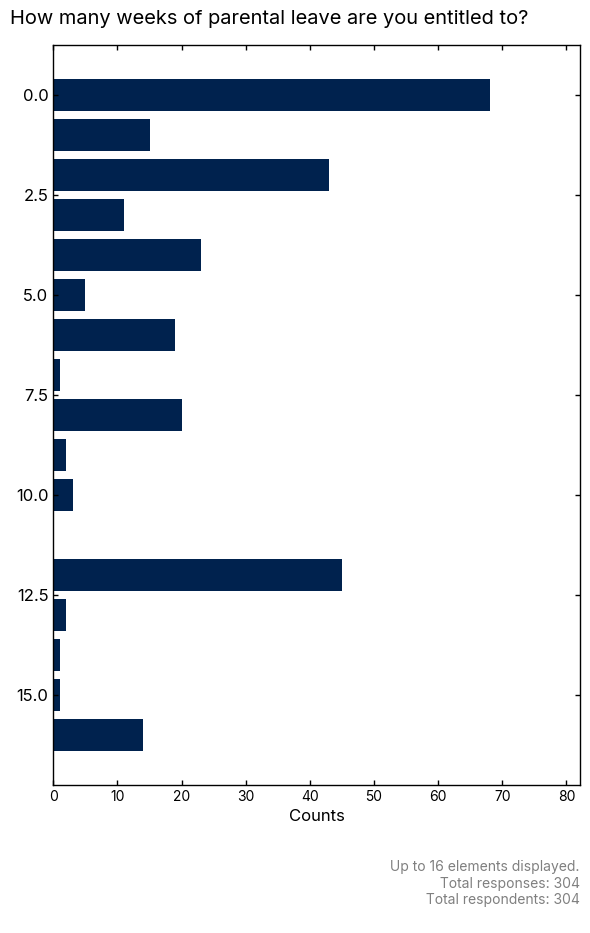

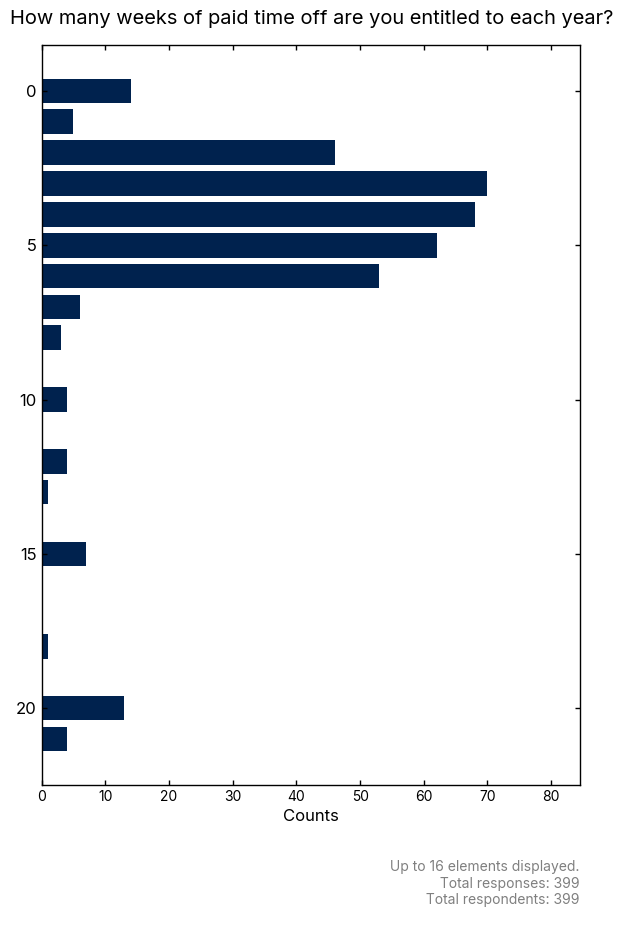

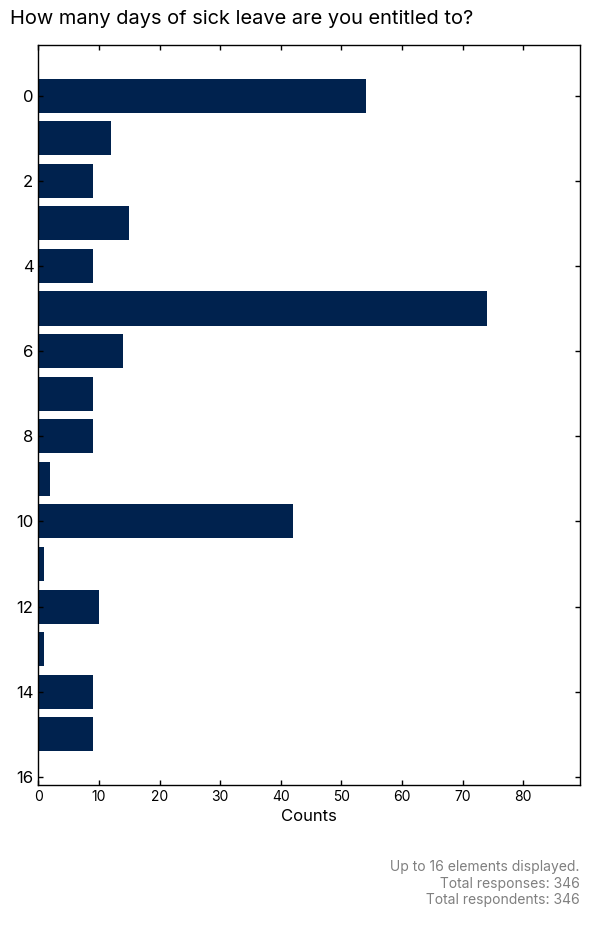

In [16]:
plotter.make_bar_plot_from_dict(
    res_company_benefits['entitlements'],
    title='What benefits does your company entitle you to?',
    saveas='company_benefits_entitlements.png',
    exclusions=['tuition', 'or continued education stipend'],
    replacements={'Educational' : 'Educational, tuition, or continued education stipend'},
    num_elements=10,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['parental_leave_weeks'], by='keys', reverse=False),
    title='How many weeks of parental leave are you entitled to?',
    saveas='company_benefits_parental_leave_weeks.png',
    num_elements=16
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['pto_weeks'], by='keys', reverse=False),
    title='How many weeks of paid time off are you entitled to each year?',
    saveas='company_benefits_pto_weeks.png',
    num_elements=16
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['sick_leave_days'], by='keys', reverse=False),
    title='How many days of sick leave are you entitled to?',
    saveas='company_benefits_sick_leave_days.png',
    num_elements=16
)




# Filter on subpopulations

In [17]:
filtered_list = analyst.filter_respondents_on(is_student=False,
                                              gender='Female')
print(len(filtered_list))

193


# Summarize stats for subpopulations

In [18]:
res = analyst.summarize_census_skills_demand(filtered_list)
pprint(res)


{'skills_in_demand': ['Scientific Observation, Data Analysis, ability to '
                      'contribute to a team',
                      '[cell knowledge]',
                      'electrochemistry, adaptability, perserverance',
                      'Cell cycling experience, electrode fabrication '
                      'experience, SEM',
                      'hands-on experience building cells; materials research '
                      'for dry processes; interdisciplinary collaboration',
                      'Data analysis, statistics, communication',
                      'troubleshooting, learning, communication',
                      'Electrochemical analysis, resilience, adaptability',
                      'materials science, electrochemistry, eagerness/ability '
                      'to learn',
                      'Fundamental electrochemistry knowledge, Material '
                      'characterization, Data analysis and interpretation',
                      'AI

# Study company information

Operate on the subset of data corresponding to working professionals who have completed the survey in its entirety.

In [19]:
res = analyst.summarize_company_satisfaction()
res

{'keys': ['I am satisfied with my compensation',
  'I am being underpaid compared to similar roles',
  'I am satisfied with the raises and/or bonuses I have been receiving'],
 'values': array([[3., 4., 2.],
        [4., 2., 3.],
        [3., 5., 2.],
        ...,
        [2., 3., 3.],
        [4., 2., 4.],
        [4., 1., 4.]], shape=(665, 3)),
 'submit_time': array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
        Timestamp('2024-10-04 20:34:34'), Timestamp('2024-10-04 20:34:32'),
        Timestamp('2024-10-04 20:31:17'), Timestamp('2024-10-04 20:28:57'),
        Timestamp('2024-10-04 20:23:39'), Timestamp('2024-10-04 20:22:55'),
        Timestamp('2024-10-04 20:22:39'), Timestamp('2024-10-04 20:16:00'),
        Timestamp('2024-10-04 20:15:36'), Timestamp('2024-10-04 20:14:41'),
        Timestamp('2024-10-04 20:12:39'), Timestamp('2024-10-04 20:09:39'),
        Timestamp('2024-10-04 20:08:20'), Timestamp('2024-10-04 20:02:18'),
        Timestamp('2024-10-04

## Salary

In [20]:
res_company_salary = analyst.summarize_company_salary()
pprint(res_company_salary)

{'salary_base_list': array([1.25000e+05, 1.25000e+05, 1.45000e+05, 1.40000e+05, 1.65000e+05,
       4.90000e+04, 8.80000e+04, 1.34000e+05, 1.80000e+05, 2.20000e+06,
       3.60000e+05, 1.30000e+05, 1.80000e+05, 1.59000e+05,         nan,
       1.21000e+05, 7.50000e+04, 8.00000e+04,         nan, 4.00000e+04,
       1.75000e+05, 9.50000e+04, 1.95000e+05, 9.00000e+04, 1.55000e+05,
       1.20000e+05, 2.00000e+05, 1.00000e+05, 3.75000e+05, 1.35000e+05,
       8.85000e+04, 1.00000e+05, 1.70000e+05,         nan, 6.00000e+05,
       2.15000e+05, 8.00000e+04, 5.70000e+04, 9.60000e+05, 1.00000e+05,
       9.70000e+04, 1.30000e+05, 1.55000e+05, 5.30000e+04, 1.20000e+05,
       3.10000e+05, 1.00000e+02, 1.70000e+05, 8.00000e+04, 8.20000e+04,
       1.20000e+05, 1.80000e+05, 1.50000e+06, 2.20000e+05, 1.41000e+05,
       8.70000e+04, 7.19940e+05, 1.82000e+05, 9.50000e+04, 9.00000e+04,
       1.60000e+05,         nan, 1.28000e+05, 6.10000e+05, 8.40000e+04,
       9.00000e+04, 1.60000e+05, 1.47000e+0

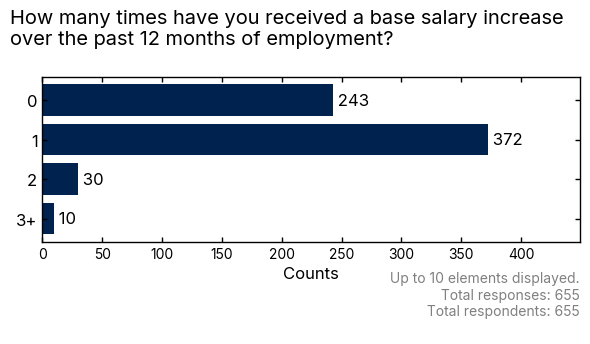

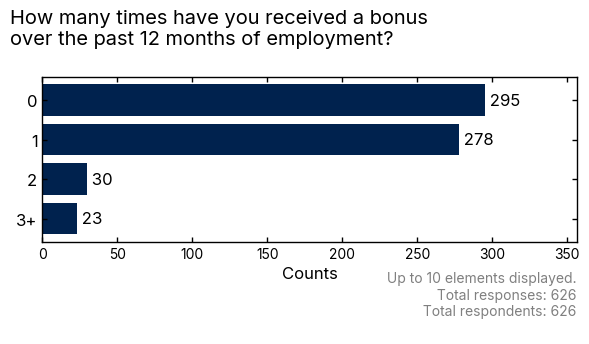

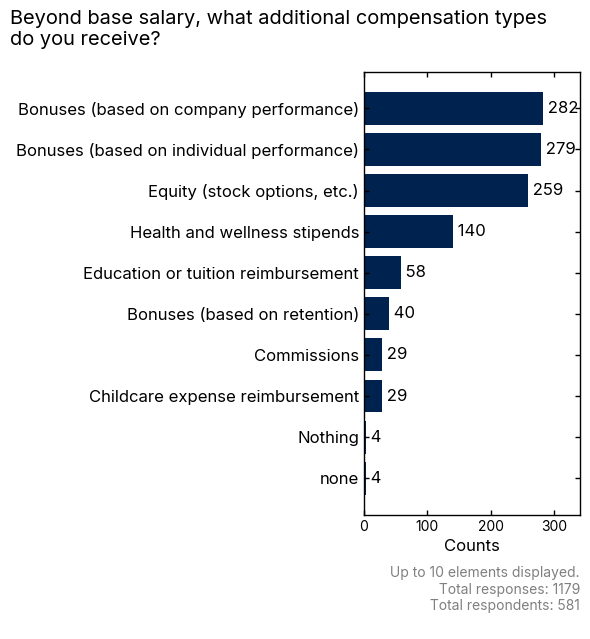

In [21]:
plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_raises'], by='keys', reverse=False),
    title='How many times have you received a base salary increase \nover the past 12 months of employment?',
    saveas='company_salary_num_raises.png'
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_salary['salary_num_bonuses'], by='keys', reverse=False),
    title='How many times have you received a bonus \nover the past 12 months of employment?',
    saveas='company_salary_num_bonuses.png'
)

plotter.make_bar_plot_from_dict(
    res_company_salary['salary_comp_types'],
    title='Beyond base salary, what additional compensation types \ndo you receive?',
    saveas='company_salary_comp_types.png',
    exclusions=['options', 'etc.)'],
    replacements={'Equity (stock' : 'Equity (stock options, etc.)'},
    sorted=True
)

## Company Info

In [22]:
res_company_info = analyst.summarize_company_info()
pprint(res_company_info)

{'company_country': {'Argentina': 2,
                     'Australia': 7,
                     'Belgium': 8,
                     'Canada': 23,
                     'Chile': 1,
                     'China': 11,
                     'Czech Republic': 1,
                     'Denmark': 3,
                     'Estonia': 1,
                     'Finland': 3,
                     'France': 18,
                     'Germany': 41,
                     'Hungary': 1,
                     'India': 40,
                     'Indonesia': 2,
                     'Iran': 3,
                     'Ireland {Republic}': 2,
                     'Israel': 4,
                     'Italy': 13,
                     'Japan': 3,
                     'Kenya': 1,
                     'Korea South': 3,
                     'Luxembourg': 1,
                     'Malaysia': 3,
                     'Mexico': 3,
                     'Morocco': 1,
                     'Netherlands': 11,
                     'Nigeria':

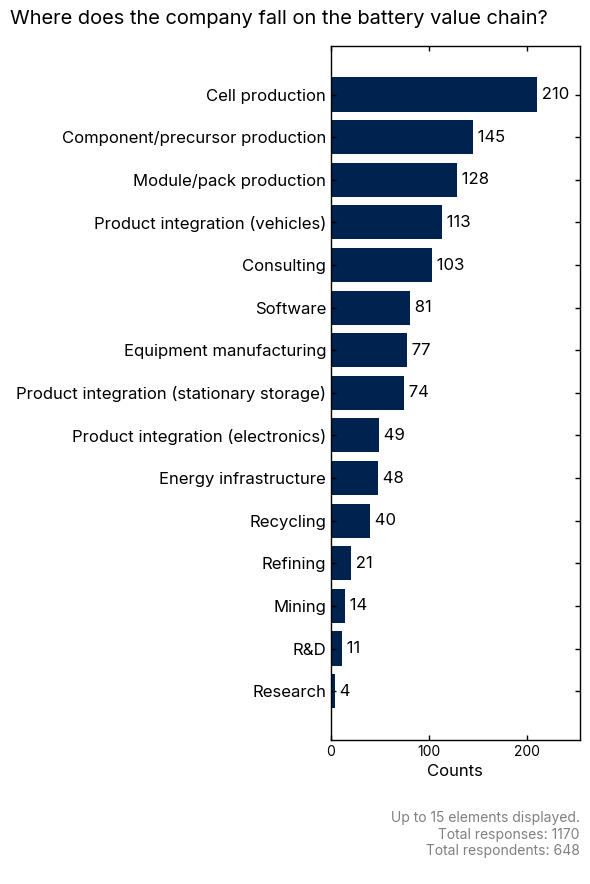

In [23]:
plotter.make_bar_plot_from_dict(res_company_info['company_value_chain'],
                                title='Where does the company fall on the battery value chain?',
                                saveas='company_value_chain.png',
                                num_elements=15,
                                exclusions=['mobility)'],
                                sorted=True,
                                replacements={'Product integration (vehicles' : 'Product integration (vehicles)'})

## Role

In [24]:
res_company_role = analyst.summarize_company_role()
pprint(res_company_role)

{'role_level': {'Career': 112,
                'Developing': 61,
                'Director/VP': 65,
                'Entry': 26,
                'Executive': 44,
                'Expert': 91,
                'Manager': 92,
                'Senior': 167,
                '_tot_': 658},
 'role_prev_industries': {'No': 217,
                          'Yes, in a different role': 187,
                          'Yes, in a similar role': 254,
                          '_tot_': 658},
 'role_prev_role_list': ['Distinguished Member of Technical Staff, Design for '
                         'Reliability',
                         'Administrative Assistant',
                         'product manger',
                         'Machine Design Engineer',
                         'Mechanical Engineer - Turbine Airfoils',
                         'Investment Analyst',
                         'Product development - body exterior',
                         'Director of R&D',
                         'Simul

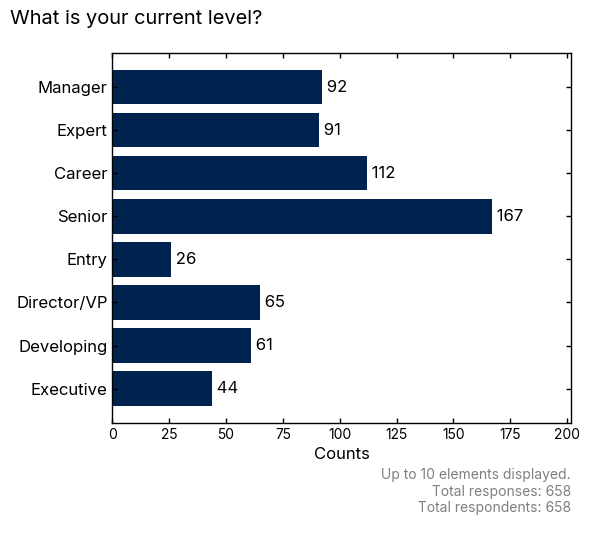

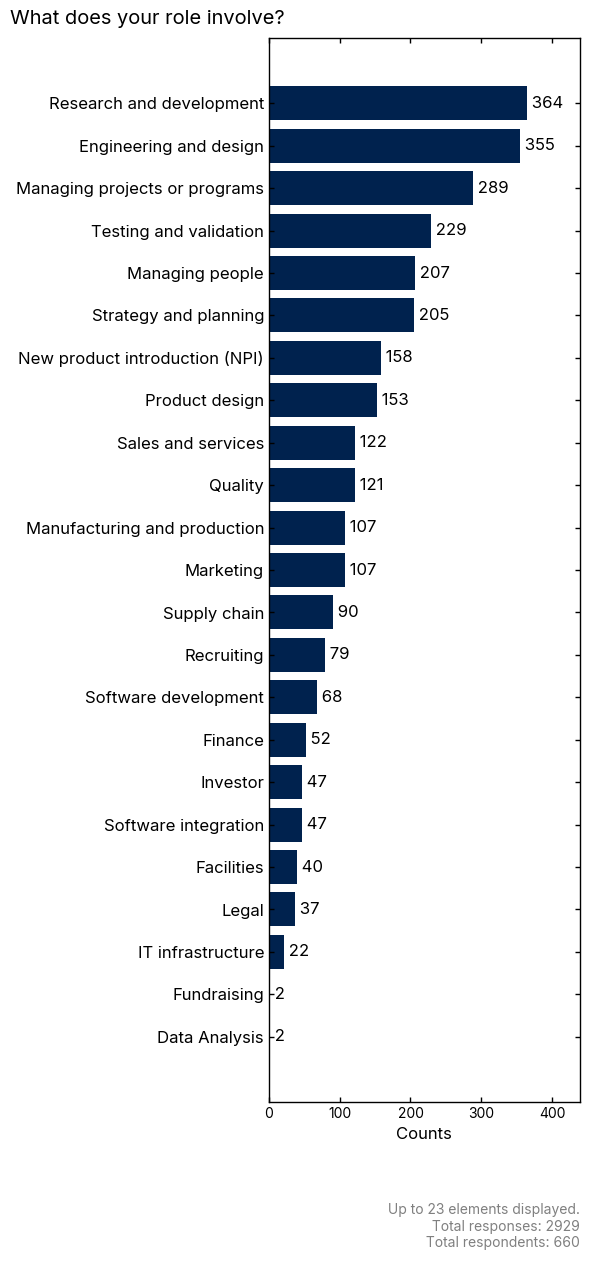

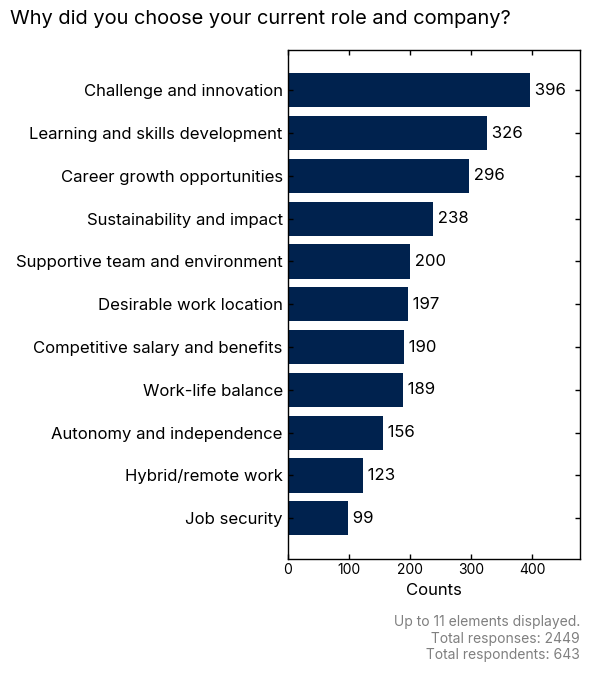

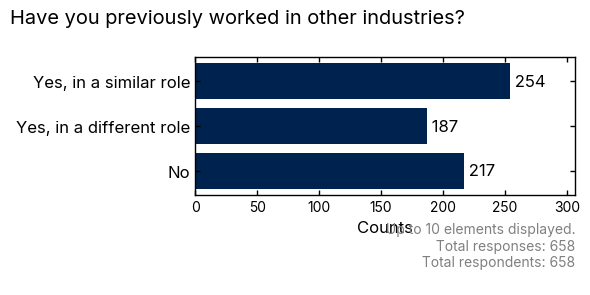

In [25]:
plotter.make_bar_plot_from_dict(res_company_role['role_level'],
                                title='What is your current level?',
                                saveas='company_role_level.png'
)

plotter.make_bar_plot_from_dict(
    res_company_role['role_role'],
    title='What does your role involve?',
    saveas='company_role.png',
    num_elements=23,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_role['role_why_choose'],
    title='Why did you choose your current role and company?',
    saveas='company_role_why_choose.png',
    num_elements=11,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_role['role_prev_industries'], by='keys', reverse=True),
    title='Have you previously worked in other industries?',
    saveas='company_role_previous_industries.png'
)

In [26]:
res_company_role['role_prev_role_list']

['Distinguished Member of Technical Staff, Design for Reliability',
 'Administrative Assistant',
 'product manger',
 'Machine Design Engineer',
 'Mechanical Engineer - Turbine Airfoils',
 'Investment Analyst',
 'Product development - body exterior',
 'Director of R&D',
 'Simulation engineer',
 'Automotive engineering for autonomous vehicles',
 'Senior Scientist',
 'project manager',
 'Instrumentation Engineer',
 'Patent Analyst',
 'Electrical Grid engineer',
 'Software Engineer',
 'Applications Engineer',
 'Scientist',
 'R&D in polymers industry',
 'Electronics manufacturing industry',
 'Senior Sourcing Manager',
 'Business Development Manager',
 'Senior Engineer',
 'Senior Materials Engineer',
 'Chemicals',
 'Laboratory Scientist',
 'engineer',
 'Metrology engineer',
 'solar expert',
 'Materials Scientist',
 'Automotive supplier analyst',
 'Science education and outreach',
 'Software engineer',
 'Intern for fuel cell manufacturing, graduate student',
 'I had many roles',
 'R&D',
 'Tec

## Company Skills

In [27]:
res_company_skills = analyst.summarize_company_skills()
pprint(res_company_skills)

{'barriers_to_talent_list': ['Startups are fighting headwinds in terms of '
                             'market and investment, startup culture is not '
                             'always the most professional, incumbents are '
                             'hard to displace',
                             'Location   (Michigan? no!)',
                             'Perception, Recruiters, Judgement',
                             'location, the potential of company or program to '
                             'succeed, team environment,',
                             'Lack of training programs specifically for the '
                             'battery industry, lack of awareness of the '
                             'battery industry',
                             'Lack of Specialised People; Large Growth in Job '
                             'Demand; Cyclic Industry',
                             'no knowledge of tech',
                             'Lack of Innovative Thinking & Pat

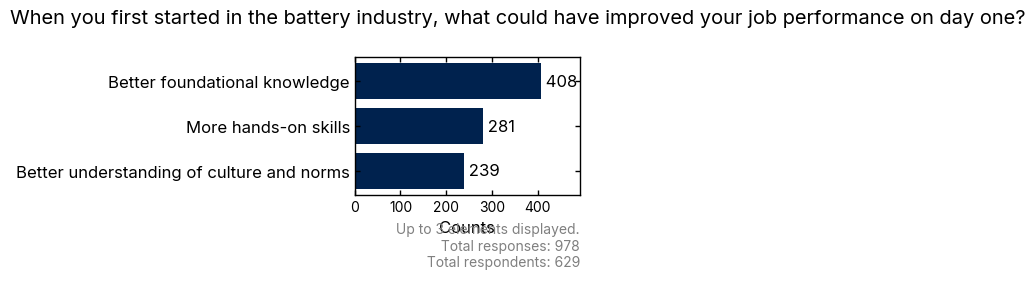

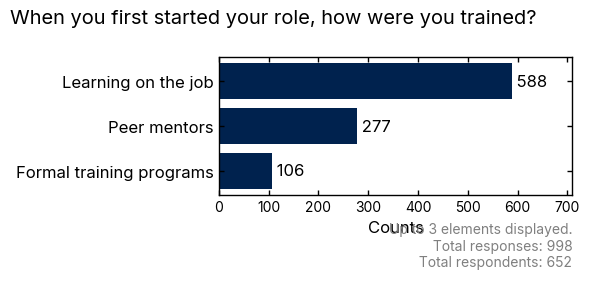

In [28]:
plotter.make_bar_plot_from_dict(
    res_company_skills['skills_how_to_improve'],
    title='When you first started in the battery industry, what could have improved your job performance on day one?',
    saveas='company_skills_how_to_improve.png',
    num_elements=3,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_skills['skills_how_was_trained'],
    title='When you first started your role, how were you trained?',
    saveas='company_skills_how_was_trained.png',
    num_elements=3,
    sorted=True
)

## Company Retention

In [29]:
res_company_retention = analyst.summarize_company_retention()
pprint(res_company_retention)

{'retention_factors': {'A non-toxic work environment and quality upper management': 1,
                       'Autonomy': 1,
                       'Career growth opportunities': 447,
                       'Chance of Success of Companies Technology/Product': 1,
                       'Company Viability and Trajectory': 1,
                       'Company Vision and Goals': 1,
                       'Company culture': 420,
                       'Company vision': 1,
                       "Company's chance for success": 1,
                       'Eco-friendliness': 1,
                       'Equity': 219,
                       'Ethics': 1,
                       'For a different potentially better role/interesting tasks': 1,
                       'Good manager': 1,
                       'I will not seek another opportunity': 1,
                       "I'm getting close to retirement and am not looking for another job.": 1,
                       'Impact': 1,
                       'I

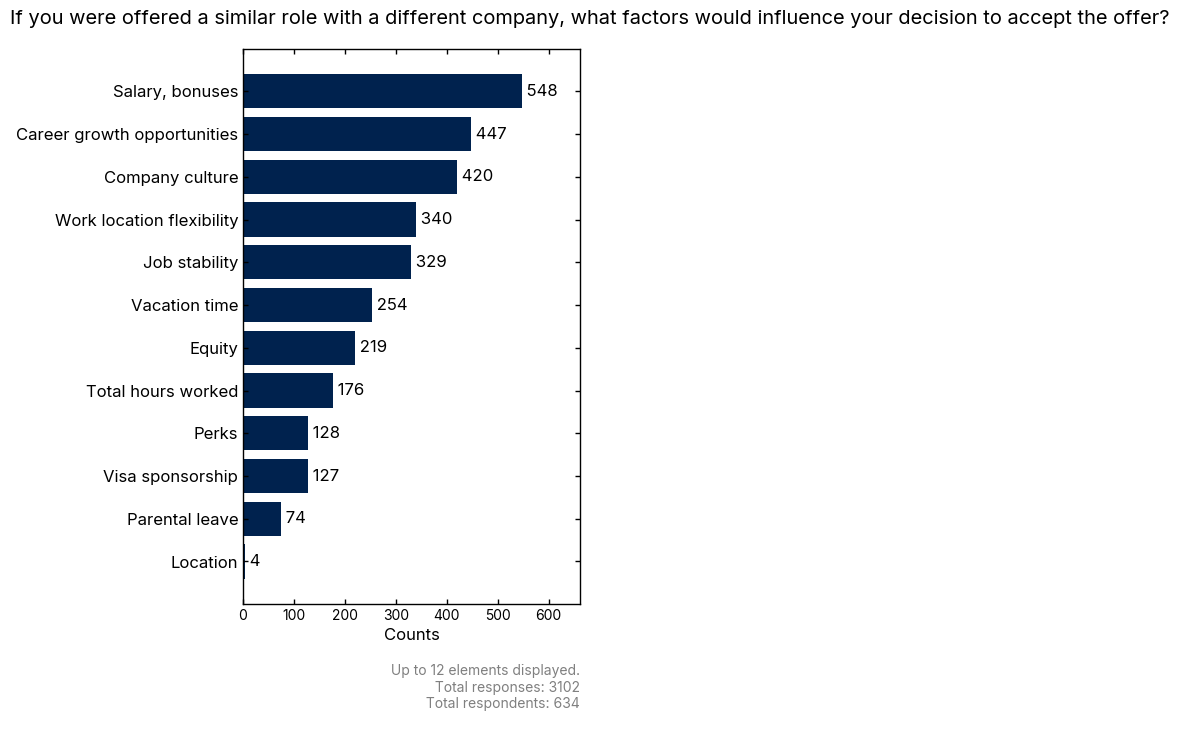

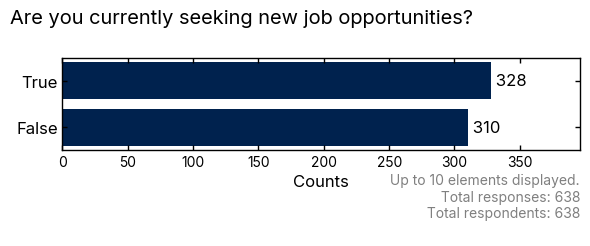

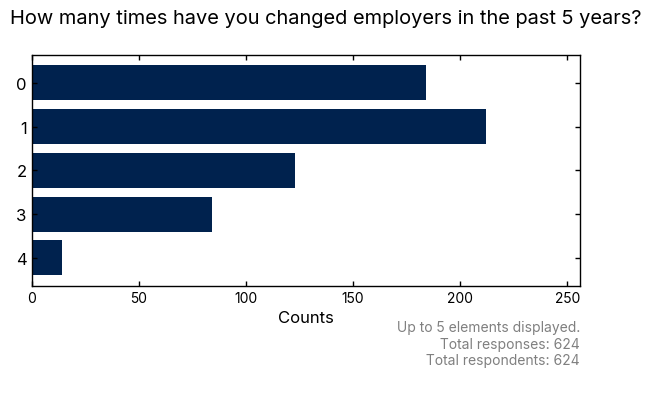

In [30]:
plotter.make_bar_plot_from_dict(
    res_company_retention['retention_factors'],
    title='If you were offered a similar role with a different company, what factors would influence your decision to accept the offer?',
    saveas='company_retention_factors.png',
    exclusions=['bonuses'],
    replacements={'Salary': 'Salary, bonuses'},
    num_elements=12,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_retention['retention_is_on_market'],
    title='Are you currently seeking new job opportunities?',
    saveas='company_retention_is_on_market.png',
    sorted=True
)

plotter.make_bar_plot_from_dict(
    res_company_retention['retention_num_employer_changes'],
    title='How many times have you changed employers in the past 5 years?',
    saveas='company_retention_num_employer_changes.png',
    num_elements=5,
)

## Company Benefits

In [31]:
res_company_benefits = analyst.summarize_company_benefits()
pprint(res_company_benefits)

{'benefits_priorities': {'keys': ['Mental health support',
                                  'Work-life balance initiatives',
                                  'Financial wellness programs',
                                  'Career development opportunities'],
                         'mean': array([3.13615023, 3.13551402, 2.83568075, 3.07328605]),
                         'stdev': array([1.18292159, 1.18216911, 1.10536215, 1.15544567]),
                         'values': array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       ...,
       [ 3.,  3.,  1.,  3.],
       [ 3.,  4.,  3.,  4.],
       [ 3.,  3.,  5.,  3.]], shape=(665, 4))},
 'entitlements': {'Advance salary': 1,
                  'Child care FSA account': 1,
                  'Educational': 100,
                  'Employee Stock Purchase Program': 1,
                  'Engineer title cost repayment': 1,
                  'Gym or physical wellness stipend': 94,
                  'Health

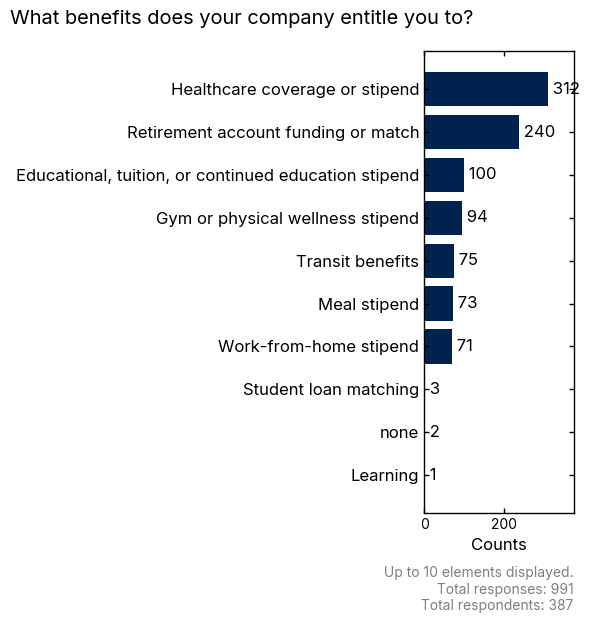

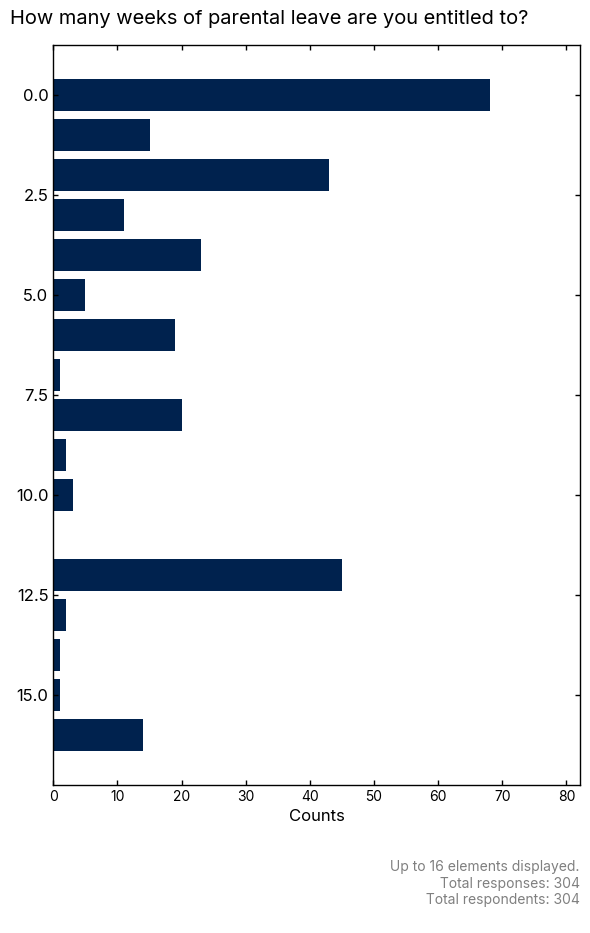

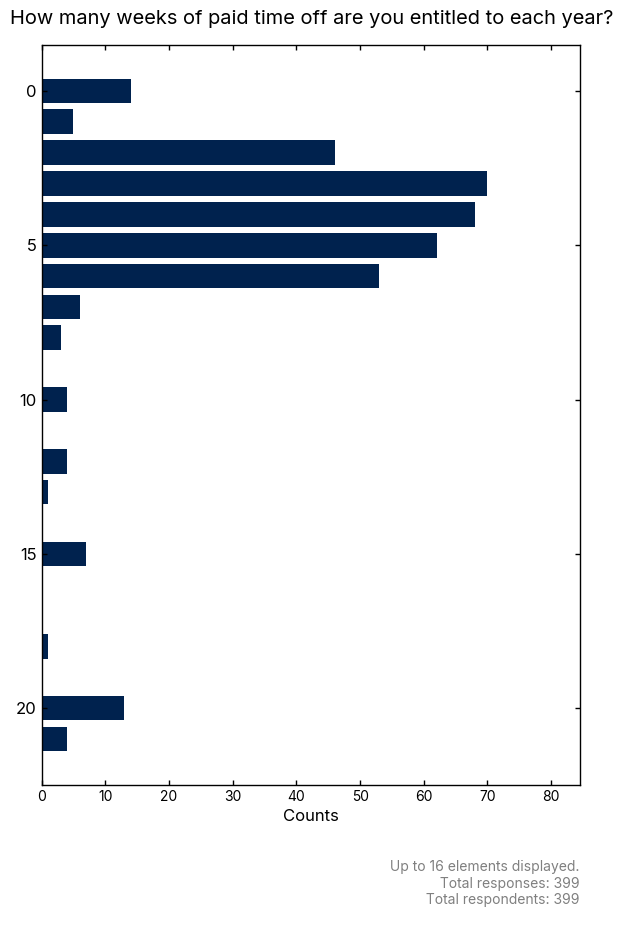

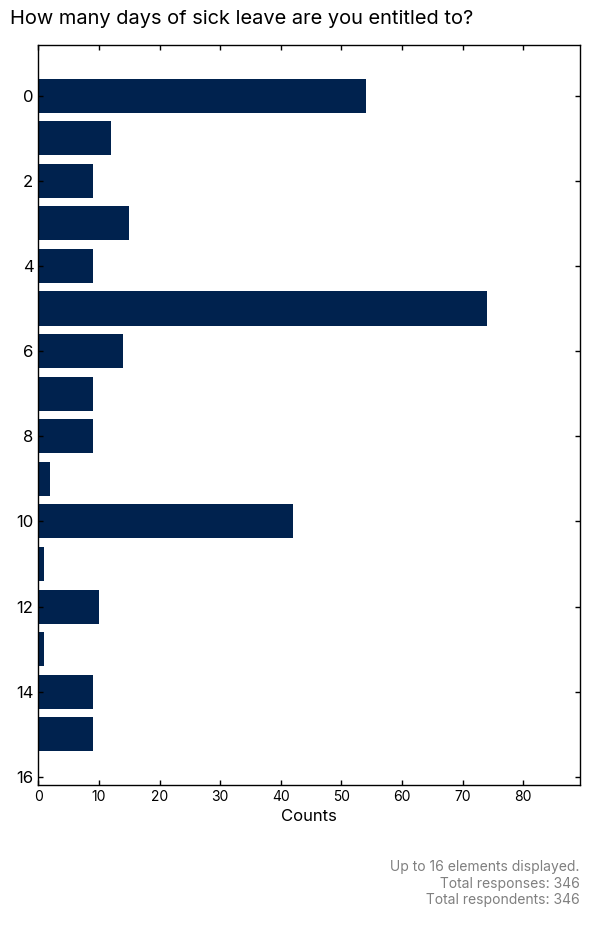

In [32]:
plotter.make_bar_plot_from_dict(
    res_company_benefits['entitlements'],
    title='What benefits does your company entitle you to?',
    saveas='company_benefits_entitlements.png',
    exclusions=['tuition', 'or continued education stipend'],
    replacements={'Educational' : 'Educational, tuition, or continued education stipend'},
    num_elements=10,
    sorted=True
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['parental_leave_weeks'], by='keys', reverse=False),
    title='How many weeks of parental leave are you entitled to?',
    saveas='company_benefits_parental_leave_weeks.png',
    num_elements=16
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['pto_weeks'], by='keys', reverse=False),
    title='How many weeks of paid time off are you entitled to each year?',
    saveas='company_benefits_pto_weeks.png',
    num_elements=16
)

plotter.make_bar_plot_from_dict(
    utils.sort_dict(res_company_benefits['sick_leave_days'], by='keys', reverse=False),
    title='How many days of sick leave are you entitled to?',
    saveas='company_benefits_sick_leave_days.png',
    num_elements=16
)


